In [1]:
import numpy as np
from manim import *

from manim_custom import *
from manim_custom.models import *
from manim_mobject_svg import *

from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.gridspec import GridSpec

plt.rcParams['text.usetex'] = True

quality = "qm"
config.verbosity = "WARNING"
config['background_color'] = WHITE

Manim Community v0.19.0

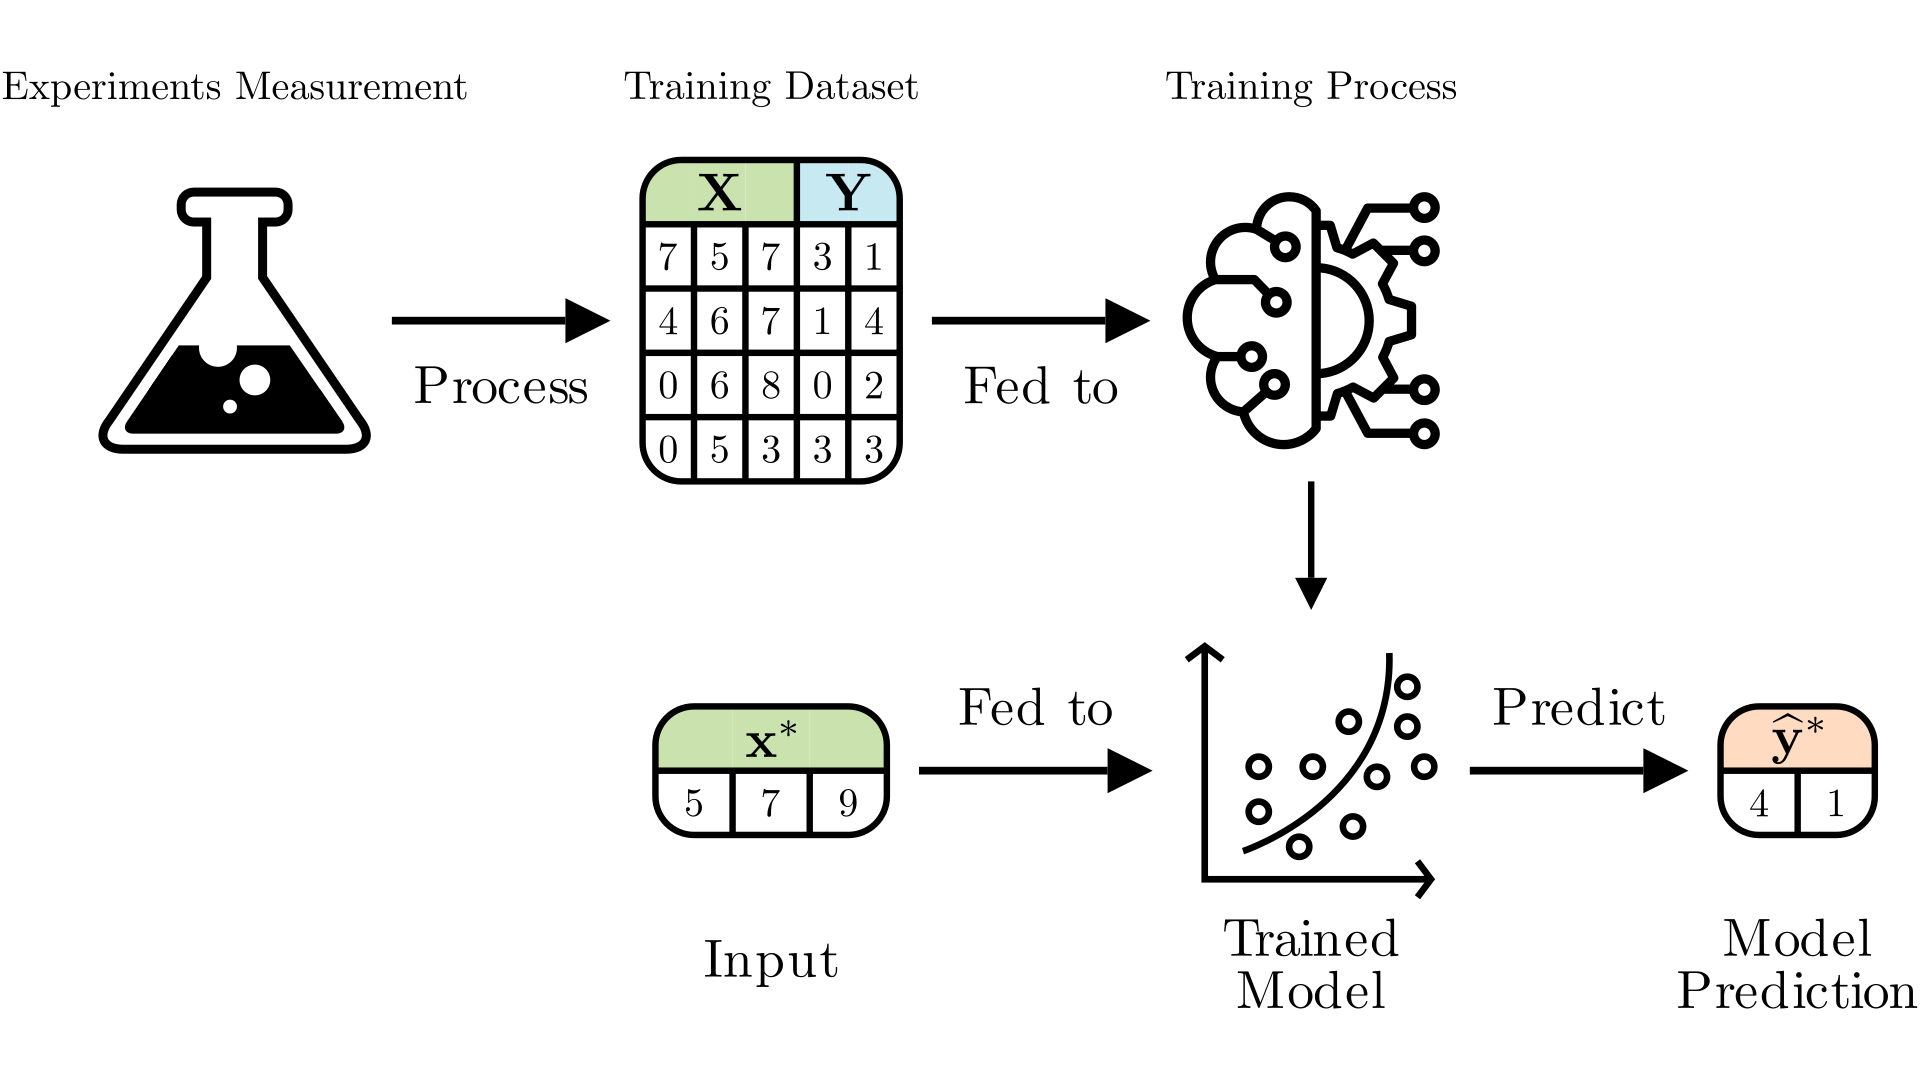

In [2]:
class MLIllustration(MovingCameraScene):

    def construct(self):
        np.random.seed(421)
        self.camera.resize_frame_shape(1)
        self.camera.frame.scale(1.05)
        font = "CMU Serif"
        step_font_size = 30
        arrow_font_size = 30
        svg_height = 2
        top_text_row = np.array([0, 3.8, 0])
        top_row = np.array([0, 2, 0])
        bottom_row = np.array([0, -1.5, 0])
        bottom_text_row = np.array([0, -3., 0])
        spacing = 2.2

        experiment = SVGMobject("ref_img/erlenmeyer-flask-outline.svg")
        experiment = experiment.scale(svg_height / experiment.height)
        experiment = experiment.move_to([experiment.get_center()[0], top_row[1], 0])

        train_set = (DataTable(5, 5, height=2.5, width=2, stroke_width=5)
                     .collapse_cols(n=-3)
                     .align_to(experiment.get_right(), LEFT)
                     .shift(spacing * RIGHT))
        train_set = train_set.move_to([train_set.get_center()[0], top_row[1], 0])

        for fill in train_set.col_fill_group[:-2]:
            fill.set_fill(GREEN_A)
        train_set.col_fill_group[-2:].set_fill(BLUE_A)

        learning = SVGMobject("ref_img/machine_learning.svg")
        learning = learning.scale(svg_height / learning.height)
        learning = learning.align_to(train_set.get_right(), LEFT)
        learning = (learning
                    .move_to([learning.get_center()[0], top_row[1], 0])
                    .shift(spacing * RIGHT))

        input_set = (DataTable(2, 3, height=1, width=1.8, stroke_width=5, fill_color=GREEN_A)
                     .collapse_cols(-1)
                     .align_to(train_set.get_right(), LEFT))
        input_set = (input_set
                     .move_to([train_set.get_center()[0], bottom_row[1], 0]))

        model = SVGMobject("ref_img/machine_learning_model_2.svg")
        model = model.scale(svg_height / model.height)
        model = (model
                 .move_to([learning.get_center()[0], bottom_row[1], 0]))

        output_set = (DataTable(2, 2, height=1, width=1.2, stroke_width=5, fill_color=ORANGE, fill_opacity=.3)
                      .collapse_cols(-1)
                      .move_to(model.get_center())
                      .align_to(model.get_right(), LEFT)
                      .shift(spacing * RIGHT))

        arrows = [
            Arrow(experiment.get_right(), train_set.get_left(), color=BLACK),
            Arrow(train_set.get_right(), learning.get_left(), color=BLACK),
            Arrow(learning.get_bottom(), model.get_top(), color=BLACK),
            Arrow(input_set.get_right(), model.get_left(), color=BLACK),
            Arrow(model.get_right(), output_set.get_left(), color=BLACK)
        ]

        text_steps = []
        for title, step in zip(["Experiments\nMeasurement", "Training\nDataset", "Training\nProcess"],
                               [experiment, train_set, learning]):
            text = Tex(title, color=BLACK, font_size=step_font_size)
            text.move_to([step.get_center()[0], top_text_row[1], 0])
            text_steps.append(text)

        for title, step in zip(["Input", "Trained\nModel", "Model\nPrediction"],
                               [input_set, model, output_set]):
            text = Paragraph(title, alignment='center', color=BLACK, font_size=step_font_size, font=font)
            text.move_to([step.get_center()[0], bottom_text_row[1], 0])
            text_steps.append(text)

        text_arrows = []
        text = Text("Process", color=BLACK, font_size=arrow_font_size, font=font)
        text.move_to(arrows[0].get_center()).shift(.5 * DOWN)
        text_arrows.append(text)
        text = Text("Fed to", color=BLACK, font_size=arrow_font_size, font=font)
        text.move_to(arrows[1].get_center()).shift(.5 * DOWN)
        text_arrows.append(text)
        text = Text("Fed to", color=BLACK, font_size=arrow_font_size, font=font)
        text.move_to(arrows[3].get_center()).shift(.5 * UP)
        text_arrows.append(text)
        text = Text("Predict", color=BLACK, font_size=arrow_font_size, font=font)
        text.move_to(arrows[4].get_center()).shift(.5 * UP)
        text_arrows.append(text)

        x_label_1 = (Tex(r'$\mathbf{X}$', color=BLACK, font_size=40)
                     .move_to(VGroup(*train_set.col_group[:2]).get_center())
                     .align_to(train_set, UP))
        x_label_1.shift(.5 * (.5 - x_label_1.height) * DOWN)

        x_label_2 = (Tex(r'$\mathbf{x}^*$', color=BLACK, font_size=40)
                     .move_to(VGroup(*train_set.col_group).get_center())
                     .align_to(input_set, UP))
        x_label_2.shift(.5 * (.5 - x_label_2.height) * DOWN)

        y_label = (Tex(r'$\mathbf{Y}$', color=BLACK, font_size=40)
                   .move_to(train_set.data_group[-2:].get_center())
                   .align_to(train_set, UP))
        y_label.shift(.5 * (.5 - y_label.height) * DOWN)

        y_pred_label = (Tex(r'$\widehat{\mathbf{y}}^*$', color=BLACK, font_size=40)
                        .move_to(output_set.get_center())
                        .align_to(output_set, UP))
        y_pred_label.shift(.5 * (.5 - y_pred_label.height) * DOWN)

        self.add(experiment, train_set, input_set, output_set, learning, model)
        self.add(*arrows)
        self.add(y_pred_label, y_label, x_label_1, x_label_2)
        self.add(*text_steps, *text_arrows)

        all_group = get_all_vmobjects(self)
        all_group.center()
        all_group.to_svg("img/02-machine_learning_concept.svg")
        #set_svg_dimensions("img/02-machine_learning_concept.svg", width="418pt")

%manim --format png MLIllustration

Manim Community v0.19.0

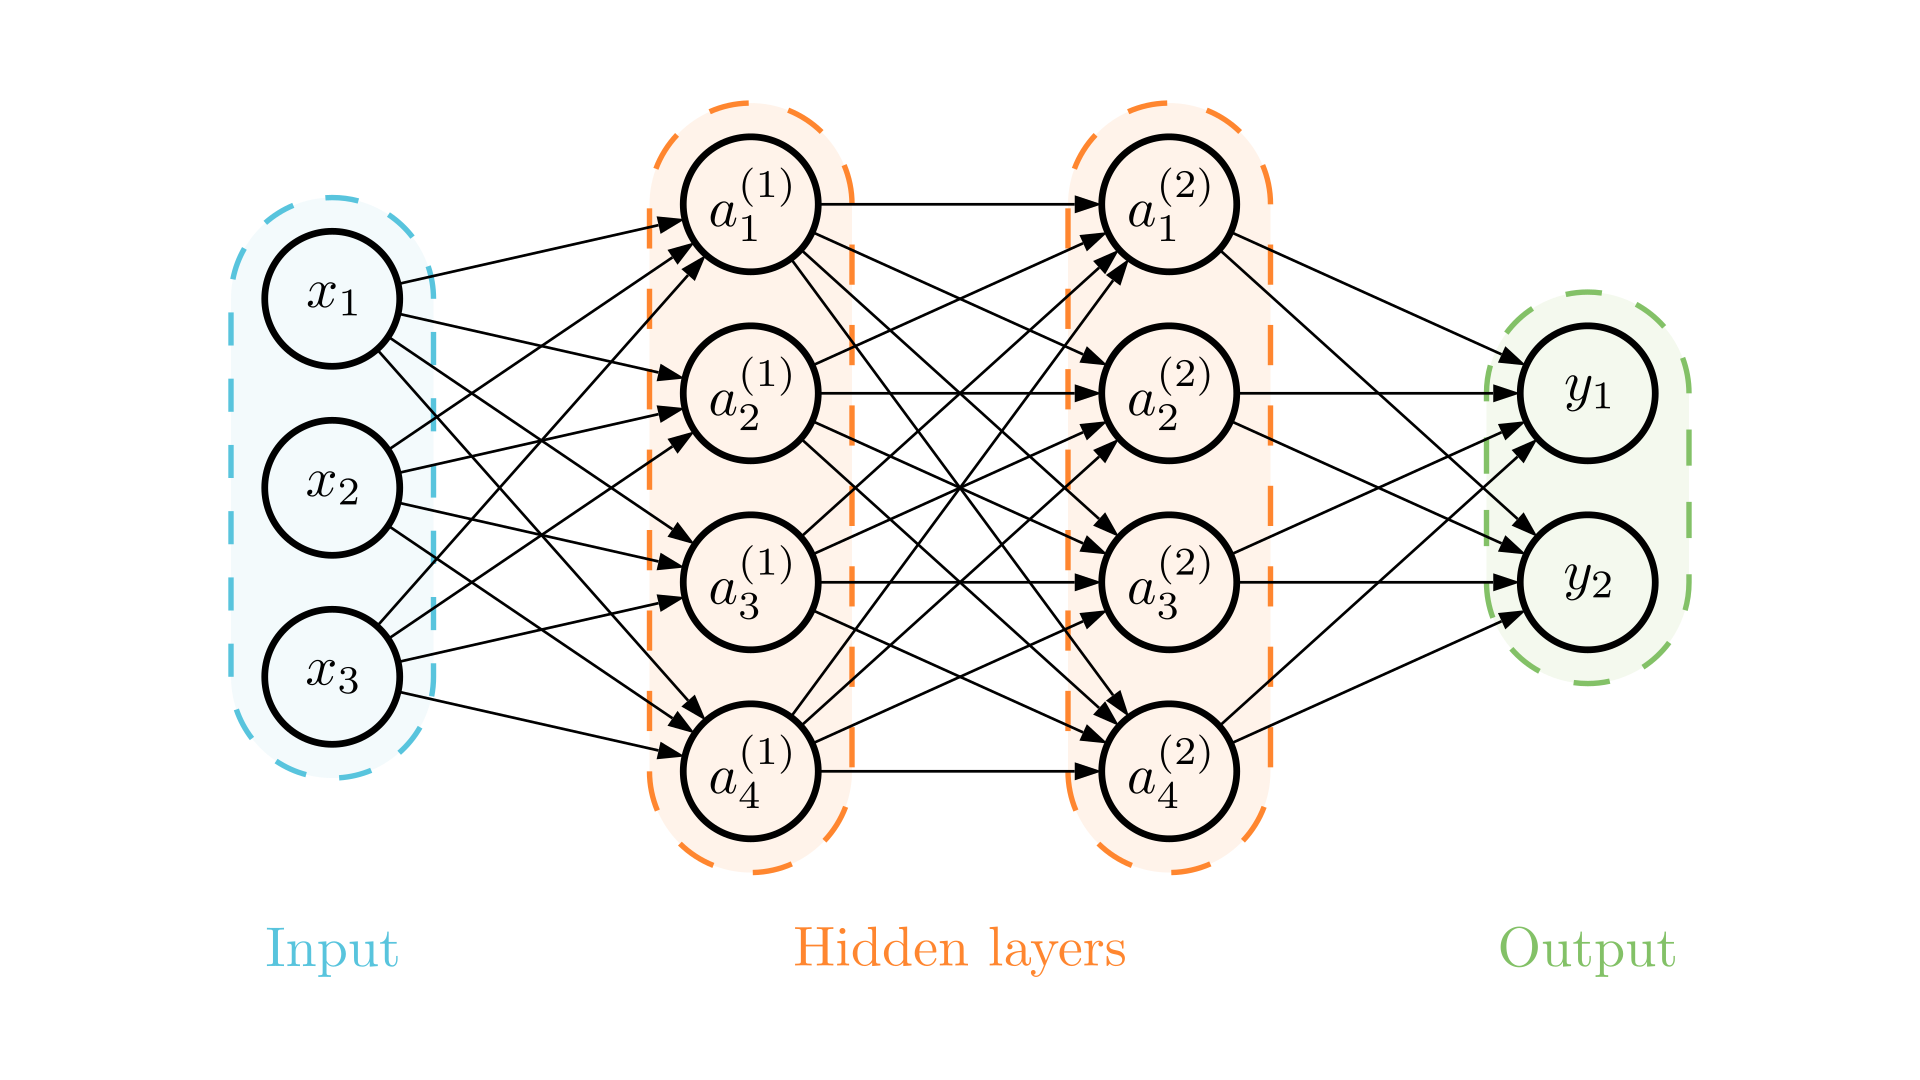

In [3]:
class MLPIllustration(Scene):
    def construct(self):
        nn = NeuralNetwork(
            input_size=3,
            n_hidden_layers=2,
            n_neurons=4,
            output_size=2,
            max_displayed_neurons=10,
            neuron_radius=0.5,
            layer_spacing=2.1,
            neuron_spacing=0.4,
            font_size=40,
            arrow=True,
            tip_kwargs={'tip_length': .2, 'tip_width': 4 / 30},
            color_neuron=BLACK,
            color_connection=BLACK,
            color_ellipsis=BLACK,
            stroke_width=2
        )

        nn.move_to(ORIGIN)

        input_rect = nn.get_layer_bounding_box(nn.input_layer, .25, stroke_color=BLUE, stroke_opacity=0,
                                               fill_color=BLUE_A)
        input_rect_stroke = DashedVMobject(input_rect, num_dashes=21).set_stroke(opacity=1)

        hidden_rects = []
        hidden_rects_strokes = []
        for layer in nn.hidden_layers:
            hidden_rect = nn.get_layer_bounding_box(layer, .25, stroke_color=ORANGE, stroke_opacity=0,
                                                    fill_color=ORANGE, fill_opacity=.1)
            hidden_rect_stroke = DashedVMobject(hidden_rect, num_dashes=22).set_stroke(opacity=1)
            hidden_rects.append(hidden_rect)
            hidden_rects_strokes.append(hidden_rect_stroke)

        output_rect = nn.get_layer_bounding_box(nn.output_layer, .25, stroke_color=GREEN, stroke_opacity=0,
                                                fill_color=GREEN_A)
        output_rect_stroke = DashedVMobject(output_rect, num_dashes=14).set_stroke(opacity=1)

        font_size = 40
        texts = [
            Tex("Input", color=BLUE, font_size=font_size).next_to(input_rect, DOWN, .4),
            Tex("Hidden layers", color=ORANGE, font_size=font_size).next_to(VGroup(*hidden_rects), DOWN, .4),
            Tex("Output", color=GREEN, font_size=font_size).next_to(output_rect, DOWN, .4),
        ]

        for text in texts:
            text.align_to(texts[1], DOWN)

        self.add(input_rect, input_rect_stroke, *hidden_rects, *hidden_rects_strokes, output_rect, output_rect_stroke,
                 nn, *texts)

        all_group = get_all_vmobjects(self)
        all_group.center()
        path = "img/02-mlp_illustration.svg"
        all_group.to_svg(path)

%manim --format png MLPIllustration

Manim Community v0.19.0

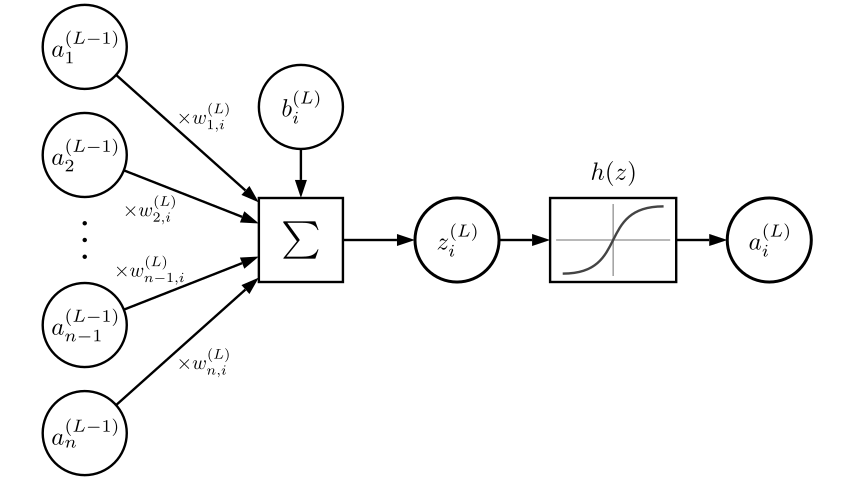

In [4]:
class NeuronIllustration(Scene):
    def construct(self):
        font_size = 40
        neuron_radius = .7
        nn = NeuralNetwork(
            input_size=5,
            n_hidden_layers=3,
            n_neurons=1,
            output_size=1,
            max_displayed_neurons=4,
            neuron_radius=neuron_radius,
            layer_spacing=2.2,
            neuron_spacing=0.4,
            arrow=True,
            tip_kwargs={'tip_length': .3, 'tip_width': .2},
            labels=False,
            color_neuron=BLACK,
            color_connection=BLACK,
            color_ellipsis=BLACK
        )

        nn.move_to(ORIGIN)
        for n in nn.hidden_layers[1:]: n.shift(LEFT)
        for n in nn.hidden_layers[2:]: n.shift(LEFT)
        nn.output_layer.shift(3 * LEFT)

        h_neuron = VGroup()
        h_neuron.add(
            Rectangle(height=2 * neuron_radius, width=3 * neuron_radius, color=BLACK).move_to(nn.hidden_layers[2][0]))
        h_neuron.add(Line(h_neuron.get_left(), h_neuron.get_right(), buff=.1, color=GRAY, stroke_width=2),
                     Line(h_neuron.get_bottom(), h_neuron.get_top(), buff=.1, color=GRAY, stroke_width=2),
                     CubicBezier([-1.5 * neuron_radius, -neuron_radius, 0.], [.5 * neuron_radius, -neuron_radius, 0.],
                                 [-.5 * neuron_radius, neuron_radius, 0.], [1.5 * neuron_radius, neuron_radius, 0.],
                                 color=GRAY_D)
                     .move_to(nn.hidden_layers[2][0])
                     .scale(.8)
                     )

        nn.hidden_layers[2].remove(nn.hidden_layers[2][0])
        nn.hidden_layers[2].add(h_neuron)

        connect_1 = nn.connection[1][0]
        connect_2 = nn.connection[2][0]
        connect_3 = nn.connection[3][0]

        connect_1.remove(connect_1.tip)
        connect_2.remove(connect_2.tip)
        connect_3.remove(connect_3.tip)

        connect_1.put_start_and_end_on(nn.hidden_layers[0][0].get_right(), nn.hidden_layers[1][0].get_left())
        connect_2.put_start_and_end_on(nn.hidden_layers[1][0].get_right(), nn.hidden_layers[2][0].get_left())
        connect_3.put_start_and_end_on(nn.hidden_layers[2][0].get_right(), nn.output_layer[0].get_left())

        connect_1.add_tip(tip_length=.3, tip_width=.2)
        connect_2.add_tip(tip_length=.3, tip_width=.2)
        connect_3.add_tip(tip_length=.3, tip_width=.2)

        text = nn._create_neurons_label(nn.input_layer,
                                        lambda i: r"$a_{" + (
                                            str(i + 1) if i < 2 else "n-1" if i == 2 else "n") + r"}^{\left( L-1 \right)}$",
                                        BLACK, font_size)

        # WEIGHT
        weights_labels = []
        for i, connection in enumerate(nn.connection[0]):
            v = connection.get_end() - connection.get_start()
            v = np.array([-v[1], v[0], 0])
            v = ((-1) ** i) * v / np.linalg.norm(v)

            symbol = (Tex(rf"$\times w_{{{i + 1 if i < 2 else "n-1" if i == 2 else "n"}, i}}^{{\left(L\right)}}$",
                          font_size=font_size * .8, color=BLACK)
                      .move_to(connection.point_from_proportion(.3 if i in (1, 2) else .5))
                      .shift(.45 * v))
            weights_labels += symbol

        # SUM
        sum_neuron = Rectangle(height=2 * neuron_radius, width=2 * neuron_radius, color=BLACK).move_to(
            nn.hidden_layers[0])
        nn.hidden_layers[0].remove(nn.hidden_layers[0][0])
        nn.hidden_layers[0].add(sum_neuron)
        for connection in nn.connection[0]:
            connection.remove(connection.tip)
            end = self._intersect_line_with_shape(connection.get_start(), sum_neuron.get_center(), sum_neuron)
            connection.put_start_and_end_on(connection.get_start(), end)
            connection.add_tip(tip_length=.3, tip_width=.2)

        sum_symbol = (Tex(r"$\boldsymbol{\sum}$", font_size=60, color=BLACK)
                      .move_to(nn.hidden_layers[0]))

        # BIAS
        neuron = (Circle(neuron_radius, color=BLACK).move_to(sum_symbol)
                  .align_to(nn.input_layer[0], UP)
                  .shift(DOWN))
        bias_symbol = Tex(r"$b_i^{\left(L\right)}$", color=BLACK, font_size=font_size).move_to(neuron)
        bias_arrow = (Line(neuron.get_center(), nn.hidden_layers[0].get_center(),
                           buff=neuron_radius, color=BLACK)
                      .add_tip(tip_length=.3, tip_width=.2))

        # Z value
        z_symbol = Tex(r"$z_i^{\left(L\right)}$", color=BLACK, font_size=font_size).move_to(nn.hidden_layers[1][0])

        # Activation function
        activation_symbol = Tex(r"$h(z)$", color=BLACK, font_size=font_size).next_to(nn.hidden_layers[2][0], UP,
                                                                                     buff=.2)

        # Activation value
        a_symbol = Tex(r"$a_i^{\left(L\right)}$", color=BLACK, font_size=font_size).move_to(nn.output_layer[0])

        # Compose
        self.add(nn, neuron, *text, bias_symbol, sum_symbol, bias_arrow, *weights_labels, z_symbol, a_symbol,
                 activation_symbol, h_neuron, sum_neuron)

        all_group = get_all_vmobjects(self)
        all_group.center()
        path = "img/02-neuron_illustration.svg"
        all_group.to_svg(path)

    def _intersect_line_with_shape(self, pointA, pointB, shape):
        """
        Find intersection of the segment A->B with a shape.
        Returns the closest intersection point to pointA.
        """
        ray = Line(start=pointA, end=pointB, buff=0)

        intersections = []
        for submob in shape.family_members_with_points():
            if isinstance(submob, VMobject):
                for i in range(len(submob.points) - 1):
                    p1, p2 = submob.points[i], submob.points[i + 1]
                    ip = self._segment_intersection(pointA, pointB, p1, p2)
                    if ip is not None:
                        intersections.append(ip)

        if intersections:
            # Return closest to pointA
            intersections.sort(key=lambda pt: np.linalg.norm(pt - pointA))
            return intersections[0]
        else:
            return None

    def _segment_intersection(self, a1, a2, b1, b2):
        """
        Compute the intersection of segment a1->a2 with b1->b2.
        Returns point or None if no intersection.
        """

        def perp(a):
            return np.array([-a[1], a[0], 0])

        da = a2 - a1
        db = b2 - b1
        dp = a1 - b1
        dap = perp(da)
        denom = np.dot(dap, db)
        if denom == 0:
            return None  # Parallel

        num = np.dot(dap, dp)
        intersection = (num / denom) * db + b1

        # Check it's within both segments
        if not all([
            self._is_between(intersection, a1, a2),
            self._is_between(intersection, b1, b2)
        ]):
            return None

        return intersection

    def _is_between(self, p, a, b):
        """Check if point p is between a and b (inclusive)"""
        minx, maxx = sorted([a[0], b[0]])
        miny, maxy = sorted([a[1], b[1]])
        return minx - 1e-6 <= p[0] <= maxx + 1e-6 and miny - 1e-6 <= p[1] <= maxy + 1e-6

%manim --format png -ql NeuronIllustration

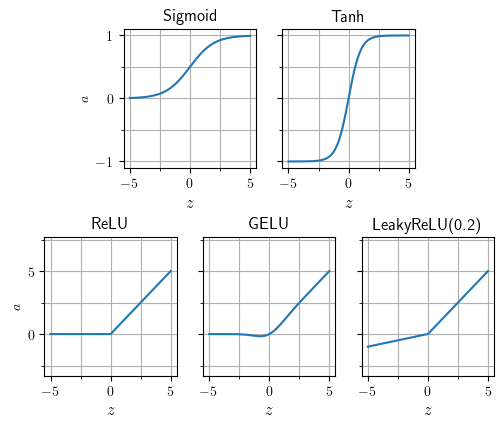

In [5]:
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator


class ActivationFunctionPlot:
    def __init__(self, figsize=(5.8, 4.5), save_path="img/02-activation_functions.pdf"):
        self.figsize = figsize
        self.save_path = save_path
        self.functions = [
            ("Sigmoid", lambda z: 1 / (1 + np.exp(-z))),
            ("Tanh", lambda z: np.tanh(z)),
            ("ReLU", lambda z: np.maximum(0, z)),
            ("GELU", lambda z: 0.5 * z * (1 + np.tanh(np.sqrt(2 / np.pi) * (z + 0.044715 * np.power(z, 3))))),
            (r"LeakyReLU(0.2)", lambda z: np.maximum(0, z) + 0.2 * np.minimum(0, z)),
        ]

    def plot(self):
        fig = plt.figure(figsize=self.figsize)
        gs = GridSpec(2, 6, figure=fig, wspace=0.5, hspace=0.5)

        ax1 = fig.add_subplot(gs[0, 1:3])
        ax2 = fig.add_subplot(gs[0, 3:5], sharex=ax1, sharey=ax1)
        ax3 = fig.add_subplot(gs[1, 0:2])
        ax4 = fig.add_subplot(gs[1, 2:4], sharex=ax3, sharey=ax3)
        ax5 = fig.add_subplot(gs[1, 4:6], sharex=ax3, sharey=ax3)

        axes = [ax1, ax2, ax3, ax4, ax5]

        ax1.set_ylabel('$a$')
        ax3.set_ylabel('$a$')

        z = np.linspace(-5, 5, 500)

        for ax, (title, fct) in zip(axes, self.functions):
            ax.grid(True, which='both')
            ax.set_xlabel('$z$', fontsize=12)
            ax.set_title(title, fontsize=12)
            ax.plot(z, fct(z))
            ax.xaxis.set_minor_locator(AutoMinorLocator(2))
            ax.yaxis.set_minor_locator(AutoMinorLocator(2))

        # Adjust y-limits of ax3 to avoid clipped LeakyReLU
        lrelu = self.functions[-1][1]
        lim = lrelu(np.array(ax3.get_xlim()))
        xsize = ax3.get_xlim()[1] - ax3.get_xlim()[0]
        delta = xsize - (lim[1] - lim[0])
        lim[0] -= 0.5 * delta
        lim[1] += 0.5 * delta
        ax3.set_ylim(lim)

        for ax in [ax2, ax4, ax5]:
            plt.setp(ax.get_yticklabels(), visible=False)

        plt.savefig(self.save_path, bbox_inches='tight', pad_inches=0.0)
        plt.show()


if __name__ == "__main__":
    plotter = ActivationFunctionPlot()
    plotter.plot()

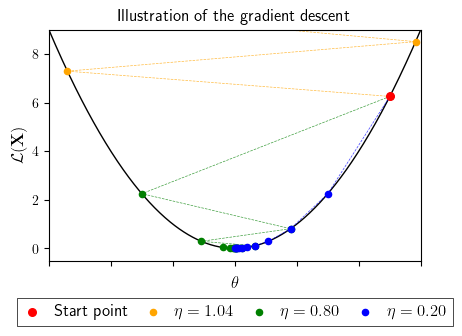

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


class GradientDescentIllustration:
    def __init__(self):
        #self.f1 = lambda x: np.sin(1.2 * (x + .4)) + 0.3 * x ** 2 + .46178
        #self.df1 = lambda x: 0.6 * x + 1.2 * np.cos(0.48 + 1.2 * x)

        self.f = lambda x: x ** 2.
        self.df = lambda x: 2. * x

    def run_1d_descent(self, x0=2.5, lr=1.2, steps=50, tol=0.01):
        x_vals = [x0]
        for _ in range(steps):
            grad = self.df(x_vals[-1])
            x_next = x_vals[-1] - lr * grad
            x_vals.append(x_next)
            if self.f(x_vals[-1]) == self.f(x_vals[-2]): break
            if abs(x_vals[-1] - x_vals[-2]) < tol: break
            #if x_vals[-1] > x_vals[-2]:
            #    lr /= 2.
        return x_vals

    def plot_curve(self):
        fig, ax = plt.subplots(figsize=(4.8, 3))

        ax.scatter(2.5, self.f(2.5), s=30, label="Start point", color='r', zorder=10)
        for i, (lr, color) in enumerate(zip([1.04, .8, .2],
                                            ['orange', 'g', 'b'])):
            x_vals = self.run_1d_descent(steps=15, lr=lr)
            x_arr = np.linspace(-3, 3, 500)
            ax.scatter(x_vals, [self.f(x) for x in x_vals], color=color, s=20, label=rf"$\eta={lr:.2f}$", zorder=i ** 2)
            ax.plot(x_vals, [self.f(x) for x in x_vals],
                    linestyle='--', linewidth=.5, color=color, alpha=.75, zorder=i ** 2 + 1)

        ax.set_ylim((-.5, np.max(self.f(x_arr))))
        ax.set_xlim((x_arr[0], x_arr[-1]))
        ax.plot(x_arr, self.f(x_arr), color='black', linewidth=1, zorder=-1)
        ax.set_title("Illustration of the gradient descent", fontsize=12)

        ax.set_xlabel(r"$\theta$", fontsize=12)
        ax.set_ylabel(r"$\mathcal{L}(\mathbf{X})$", fontsize=12)
        ax.set_xticklabels([])
        legend = ax.legend(
            fontsize=12,
            loc='upper center',
            bbox_to_anchor=(0.5, -0.125),
            ncol=4,
            frameon=True,  # Draw a box
            fancybox=False,  # Square corners (set True for rounded)
            edgecolor='black',  # Border color
            framealpha=1.0,  # Full opacity
            columnspacing=1,  # Space between columns (default is 2.0)
            handlelength=1
        )

        legend.get_frame().set_linewidth(0.5)

        plt.savefig("img/02-gradient_descent_1d.pdf", bbox_inches='tight')
        plt.show()
        plt.close()


if __name__ == "__main__":
    vis = GradientDescentIllustration()
    vis.plot_curve()

Manim Community v0.19.0

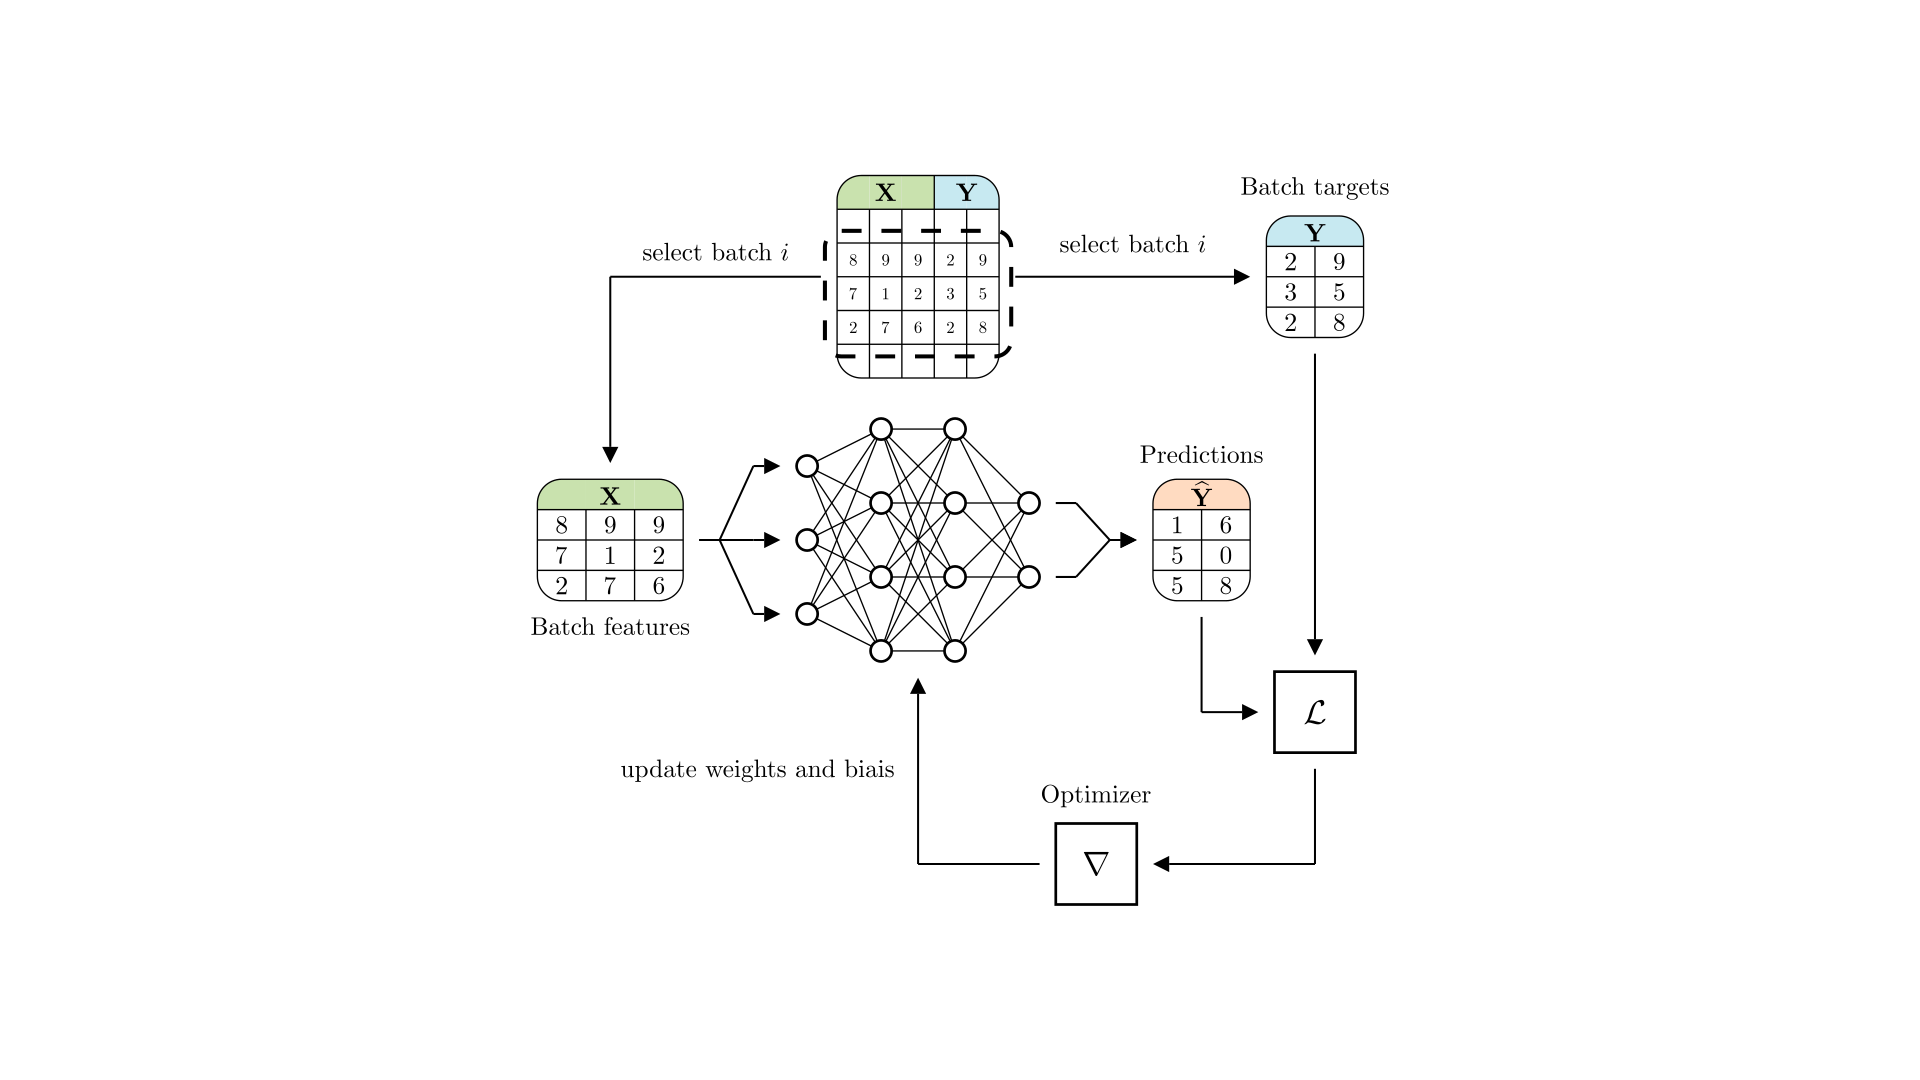

In [107]:
from manim import Line, VGroup


class Polyline(VGroup):
    def __init__(self, *pts, color=BLACK, stroke_width=5, **kwargs):
        super().__init__(
            *[Line(i, j, color=color, stroke_width=stroke_width) for i, j in zip(pts[:-1], pts[1:])],
            **kwargs
        )

    def add_tip(self, **kwargs):
        self[-1].add_tip(**kwargs)


class TrainingIllustration(Scene):
    def construct(self):
        nn = NeuralNetwork(
            input_size=3,
            n_hidden_layers=2,
            n_neurons=4,
            output_size=2,
            max_displayed_neurons=10,
            neuron_radius=0.15,
            neuron_stoke_width=2,
            layer_spacing=.75,
            neuron_spacing=0.75,
            font_size=40,
            arrow=False,
            labels=False,
            tip_kwargs={'tip_length': .2, 'tip_width': 4 / 30},
            color_neuron=BLACK,
            color_connection=BLACK,
            color_ellipsis=BLACK,
            stroke_width=1
        )

        spacing = .1
        operator_h = .5
        operator_fontsize = 20
        top_offset = 1
        bottom_offset = -1
        bottom_center = -2
        arrow_stroke_width = 1.5
        tip_kwargs = {'tip_length': .1, 'tip_width': .1}
        hop_radius = 0
        pinn_spacing = .75

        (nn.scale(1.5 / nn.height)
         .move_to(ORIGIN))

        train_set = (DataTable(6, 5, height=2.5, width=2, stroke_width=1, data_fontsize=20)
                     .collapse_cols(n=-3))

        (train_set.scale(.5)
         .align_to(nn.get_center() + UP * top_offset, DOWN))

        for fill in train_set.col_fill_group[:-2]:
            fill.set_fill(GREEN_A)
        train_set.col_fill_group[-2:].set_fill(BLUE_A)

        # Arrow in model
        w = .5
        pts = [neuron.get_left() + spacing * LEFT for neuron in nn.input_layer]
        start = np.mean(pts, axis=0) + w * LEFT
        arrows = [
            Polyline(start, start + w / 4 * RIGHT, pt + w / 3 * LEFT, pt, stroke_width=arrow_stroke_width)
            for pt in pts
        ]
        for arrow in arrows:
            arrow.add_tip(**tip_kwargs)

        arrows_in = VGroup(*arrows).next_to(nn, LEFT, buff=spacing)

        # Input set
        input_set = (DataTable(4, 3, height=1.5, width=1.8, stroke_width=1, fill_color=GREEN_A)
                     .collapse_cols(-1)
                     .scale(.5)
                     .next_to(arrows_in, LEFT, buff=spacing))

        # Arrow out model
        w = .5
        pts = [neuron.get_right() + spacing * RIGHT for neuron in nn.output_layer]
        end = np.mean(pts, axis=0) + w * RIGHT
        arrows = [
            Polyline(pt, pt + w / 4 * RIGHT, end + w / 3 * LEFT, end, stroke_width=arrow_stroke_width)
            for pt in pts
        ]
        for arrow in arrows:
            arrow.add_tip(**tip_kwargs)

        arrows_out = VGroup(*arrows).next_to(nn, RIGHT, buff=spacing)

        # Prediction set
        prediction_set = (DataTable(4, 2, height=1.5, width=1.2, stroke_width=1, fill_color=ORANGE, fill_opacity=.3)
                          .collapse_cols(-1)
                          .scale(.5)
                          .next_to(arrows_out, RIGHT, buff=spacing))

        target_set = (DataTable(4, 2, height=1.5, width=1.2, stroke_width=1, fill_color=BLUE_A)
                      .collapse_cols(-1)
                      .scale(.5)
                      .next_to(prediction_set, RIGHT, buff=spacing))
        target_set.shift((train_set.get_center() - target_set.get_center())[1] * UP)

        gradient_operator = (Operator(operator_h, operator_h, r'$\nabla$', font_size=operator_fontsize)
                             .move_to([arrows_out.get_center()[0], bottom_center, 0]))

        L_data_operator = (Operator(operator_h, operator_h, r'$\mathcal{L}$', font_size=operator_fontsize)
                           .move_to([target_set.get_center()[0],
                                     (prediction_set.get_bottom() + .5 * (
                                             gradient_operator.get_top() - prediction_set.get_bottom()))[1],
                                     0.]))

        # Batch_arrow
        arrows = [
            Polyline(train_set.get_left() + spacing * LEFT,
                     [input_set.get_center()[0], train_set.get_center()[1], 0],
                     input_set.get_top() + spacing * UP, stroke_width=arrow_stroke_width),
            Polyline(train_set.get_right() + spacing * RIGHT,
                     target_set.get_left() + spacing * LEFT, stroke_width=arrow_stroke_width),
        ]
        for arrow in arrows: arrow.add_tip(**tip_kwargs)
        arrows_batch = VGroup(*arrows)

        # Loss data arrow
        arrows = [
            Polyline(L_data_operator.get_bottom() + spacing * DOWN,
                     [L_data_operator.get_center()[0], gradient_operator.get_center()[1], 0.],
                     gradient_operator.get_right() + spacing * RIGHT, stroke_width=arrow_stroke_width)
        ]
        for arrow in arrows: arrow.add_tip(**tip_kwargs)
        arrows_l_data = VGroup(*arrows)

        # Update arrow
        arrows = [
            Polyline(gradient_operator.get_left() + spacing * LEFT,
                     [nn.get_center()[0], gradient_operator.get_center()[1], 0],
                     nn.get_bottom() + spacing * DOWN, stroke_width=arrow_stroke_width)
        ]
        for arrow in arrows: arrow.add_tip(**tip_kwargs)
        arrows_update = VGroup(*arrows)

        # Prediction arrows
        arrows = [
            Polyline(prediction_set.get_bottom() + spacing * DOWN,
                     [prediction_set.get_center()[0], L_data_operator.get_center()[1], 0],
                     L_data_operator.get_left() + spacing * LEFT, stroke_width=arrow_stroke_width),
        ]
        for arrow in arrows: arrow.add_tip(**tip_kwargs)
        arrows_pred = VGroup(*arrows)

        # Target arrows
        target_arrow = VGroup(
            Line(target_set.get_bottom() + spacing * DOWN,
                 L_data_operator.get_top() + spacing * UP,
                 color=BLACK, stroke_width=arrow_stroke_width),
        )
        target_arrow[-1].add_tip(**tip_kwargs)

        # Batch highlighting

        row_group = VGroup(*train_set.row_group[1:])
        h = row_group.height
        w = row_group.width
        batch_highlight_inside = (RoundedRectangle(corner_radius=.1, height=h + .15, width=w + .15, stroke_width=3,
                                                   stroke_opacity=0., stroke_color=BLACK, fill_opacity=0.,
                                                   fill_color=YELLOW)
                                  .move_to(row_group))
        batch_highlight = DashedVMobject(batch_highlight_inside).set_stroke(opacity=1)

        # Make batch values correct
        train_set.data_group.remove(*train_set.data_group[:5],
                                    *train_set.data_group[-5:])
        new_labels = []
        for i in range(3):
            for j in range(3):
                label = input_set.data_group[i * 3 + j]
                font_size = label.height
                label_loc = label.get_center()
                new_label = (train_set.data_group[i * 5 + j]
                             .copy()
                             .move_to(label_loc))
                new_label.scale(font_size / new_label.height)
                new_labels.append(new_label)
        input_set.data_group.remove(*input_set.data_group)
        input_set.data_group.add(*new_labels)

        new_labels = []
        for i in range(3):
            for j in range(2):
                label = target_set.data_group[i * 2 + j]
                font_size = label.height
                label_loc = label.get_center()
                new_label = (train_set.data_group[i * 5 + 3 + j]
                             .copy()
                             .move_to(label_loc))
                new_label.scale(font_size / new_label.height)
                new_labels.append(new_label)
        target_set.data_group.remove(*target_set.data_group)
        target_set.data_group.add(*new_labels)

        # Add sets labels
        train_set_texts = [
            Tex(r'$\mathbf{X}$', color=BLACK, font_size=15)
            .next_to(train_set.get_top(), DOWN, buff=.05)
            .shift(LEFT * .2),
            Tex(r'$\mathbf{Y}$', color=BLACK, font_size=15)
            .next_to(train_set.get_top(), DOWN, buff=.05)
            .shift(RIGHT * .3)
        ]

        input_set_texts = [
            Tex(r'$\mathbf{X}$', color=BLACK, font_size=15)
            .next_to(input_set.get_top(), DOWN, buff=.05)
        ]

        target_set_texts = [
            Tex(r'$\mathbf{Y}$', color=BLACK, font_size=15)
            .next_to(target_set.get_top(), DOWN, buff=.05)
        ]

        pred_set_texts = [
            Tex(r'$\widehat{\mathbf{Y}}$', color=BLACK, font_size=15)
            .next_to(prediction_set.get_top(), DOWN, buff=.01)
        ]

        # Arrow text
        batch_texts = [
            Tex(r"$\text{select batch }i$", color=BLACK, font_size=15).next_to(arrows_batch[0][0], UP, buff=spacing),
            Tex(r"$\text{select batch }i$", color=BLACK, font_size=15).next_to(arrows_batch[1][0], UP, buff=spacing),
            Tex(r"$\text{Batch features}$", color=BLACK, font_size=15).next_to(input_set, DOWN, buff=spacing),
            Tex(r"$\text{Batch targets}$", color=BLACK, font_size=15).next_to(target_set, UP, buff=spacing)
        ]

        gradient_text = [
            Tex(r"$\text{Optimizer}$", color=BLACK, font_size=15).next_to(gradient_operator, UP, buff=spacing),
            Tex(r"$\text{update weights and biais}$", color=BLACK, font_size=15).next_to(arrows_update[0][1], LEFT, buff=spacing)
        ]

        prediction_text = [
            Tex(r"$\text{Predictions}$", color=BLACK, font_size=15).next_to(prediction_set, UP, buff=spacing)
        ]

        self.add(train_set, input_set, prediction_set, target_set, nn,
                 L_data_operator, gradient_operator, arrows_in,
                 arrows_out, arrows_pred, arrows_l_data, arrows_update, target_arrow,
                 arrows_batch, batch_highlight, batch_highlight_inside)

        self.add(*train_set_texts, *input_set_texts, *target_set_texts, *pred_set_texts)
        self.add(*batch_texts, *gradient_text, *prediction_text)

        all_group = get_all_vmobjects(self)
        all_group.center()
        path = "img/02-training_illustration.svg"
        all_group.to_svg(path)
        all_group.scale(1.2)

%manim --format png TrainingIllustration

Manim Community v0.19.0

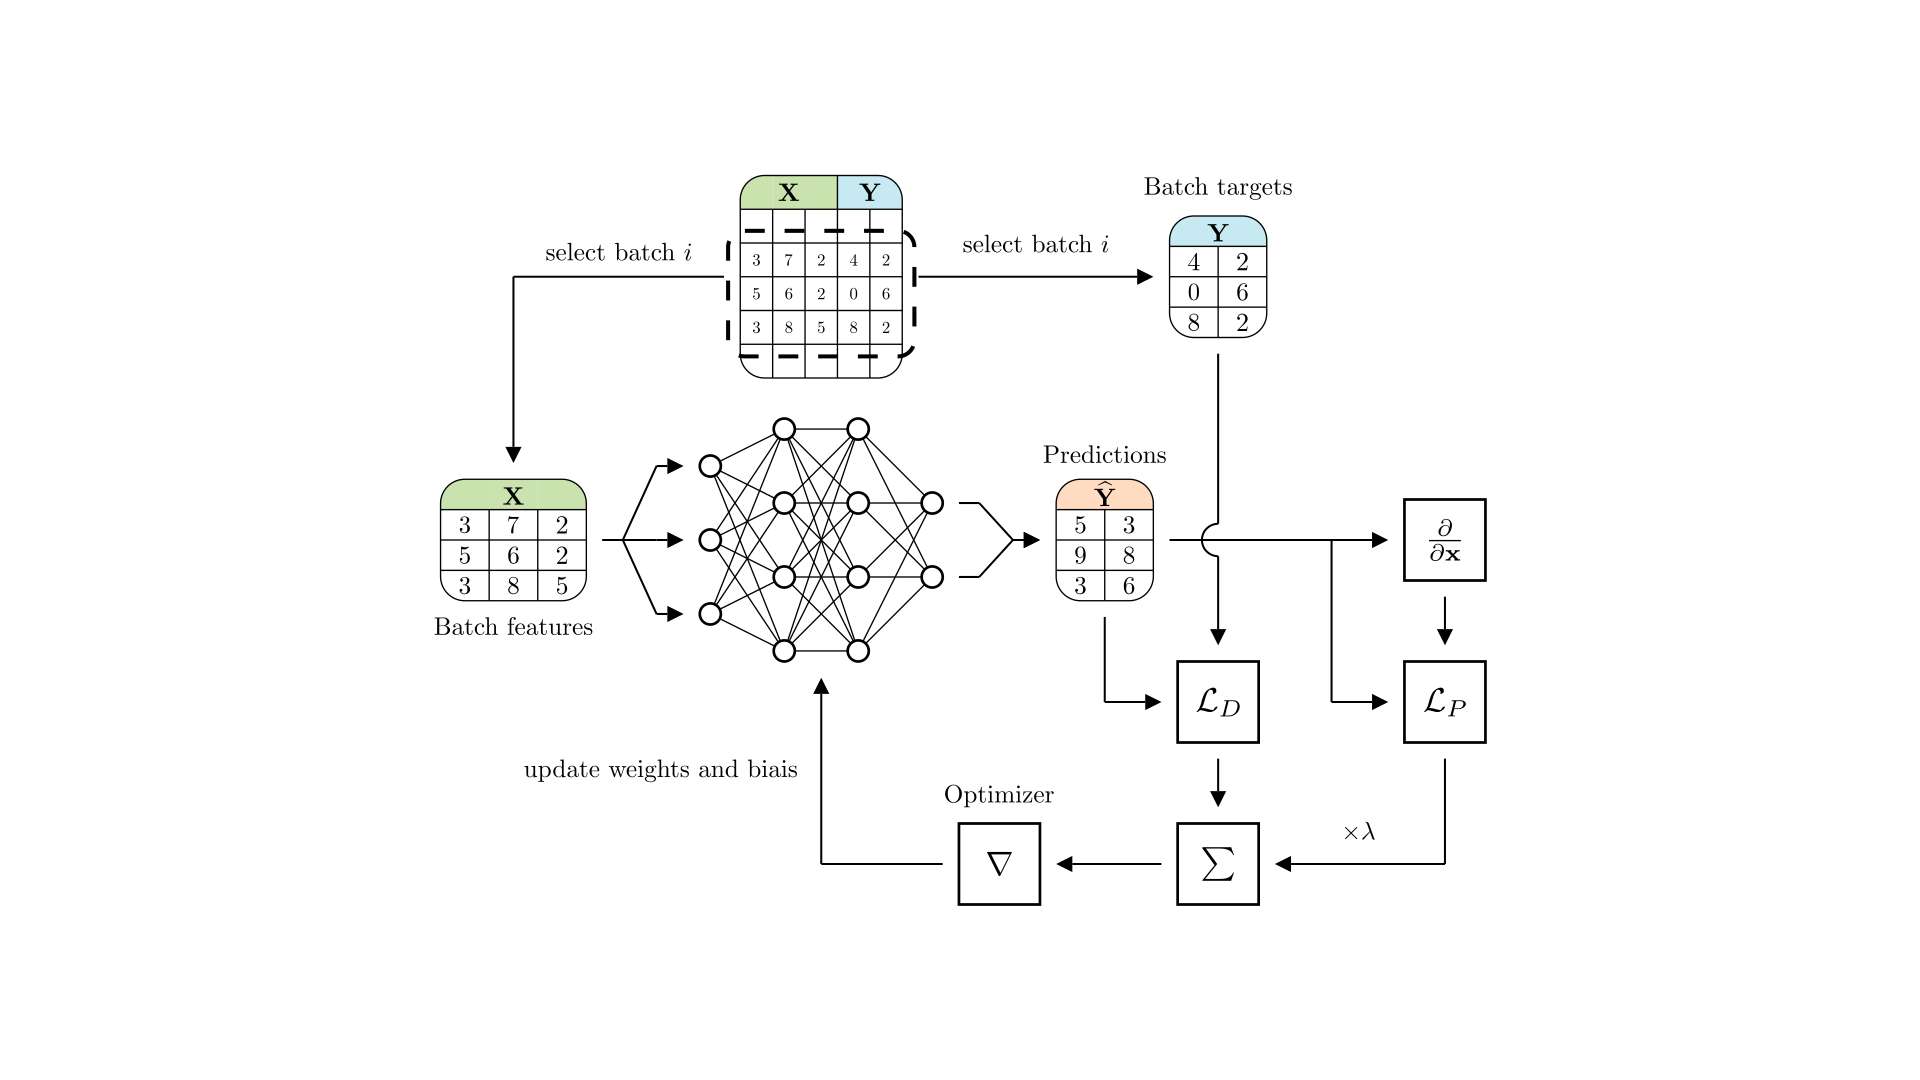

In [104]:
from manim import Line, VGroup


class Polyline(VGroup):
    def __init__(self, *pts, color=BLACK, stroke_width=5, **kwargs):
        super().__init__(
            *[Line(i, j, color=color, stroke_width=stroke_width) for i, j in zip(pts[:-1], pts[1:])],
            **kwargs
        )

    def add_tip(self, **kwargs):
        self[-1].add_tip(**kwargs)


class PINNTrainingIllustration(Scene):
    def construct(self):
        nn = NeuralNetwork(
            input_size=3,
            n_hidden_layers=2,
            n_neurons=4,
            output_size=2,
            max_displayed_neurons=10,
            neuron_radius=0.15,
            neuron_stoke_width=2,
            layer_spacing=.75,
            neuron_spacing=0.75,
            font_size=40,
            arrow=False,
            labels=False,
            tip_kwargs={'tip_length': .2, 'tip_width': 4 / 30},
            color_neuron=BLACK,
            color_connection=BLACK,
            color_ellipsis=BLACK,
            stroke_width=1
        )

        spacing = .1
        operator_h = .5
        operator_fontsize = 20
        top_offset = 1
        bottom_offset = -1
        bottom_center = -2
        arrow_stroke_width = 1.5
        tip_kwargs = {'tip_length': .1, 'tip_width': .1}
        hop_radius = .1
        pinn_spacing = .75

        (nn.scale(1.5 / nn.height)
         .move_to(ORIGIN))

        train_set = (DataTable(6, 5, height=2.5, width=2, stroke_width=1, data_fontsize=20)
                     .collapse_cols(n=-3))

        (train_set.scale(.5)
         .align_to(nn.get_center() + UP * top_offset, DOWN))

        for fill in train_set.col_fill_group[:-2]:
            fill.set_fill(GREEN_A)
        train_set.col_fill_group[-2:].set_fill(BLUE_A)

        # Arrow in model
        w = .5
        pts = [neuron.get_left() + spacing * LEFT for neuron in nn.input_layer]
        start = np.mean(pts, axis=0) + w * LEFT
        arrows = [
            Polyline(start, start + w / 4 * RIGHT, pt + w / 3 * LEFT, pt, stroke_width=arrow_stroke_width)
            for pt in pts
        ]
        for arrow in arrows:
            arrow.add_tip(**tip_kwargs)

        arrows_in = VGroup(*arrows).next_to(nn, LEFT, buff=spacing)

        # Input set
        input_set = (DataTable(4, 3, height=1.5, width=1.8, stroke_width=1, fill_color=GREEN_A)
                     .collapse_cols(-1)
                     .scale(.5)
                     .next_to(arrows_in, LEFT, buff=spacing))

        # Arrow out model
        w = .5
        pts = [neuron.get_right() + spacing * RIGHT for neuron in nn.output_layer]
        end = np.mean(pts, axis=0) + w * RIGHT
        arrows = [
            Polyline(pt, pt + w / 4 * RIGHT, end + w / 3 * LEFT, end, stroke_width=arrow_stroke_width)
            for pt in pts
        ]
        for arrow in arrows:
            arrow.add_tip(**tip_kwargs)

        arrows_out = VGroup(*arrows).next_to(nn, RIGHT, buff=spacing)

        # Prediction set
        prediction_set = (DataTable(4, 2, height=1.5, width=1.2, stroke_width=1, fill_color=ORANGE, fill_opacity=.3)
                          .collapse_cols(-1)
                          .scale(.5)
                          .next_to(arrows_out, RIGHT, buff=spacing))

        target_set = (DataTable(4, 2, height=1.5, width=1.2, stroke_width=1, fill_color=BLUE_A)
                      .collapse_cols(-1)
                      .scale(.5)
                      .next_to(prediction_set, RIGHT, buff=spacing))
        target_set.shift((train_set.get_center() - target_set.get_center())[1] * UP)

        diff_operator = (Operator(operator_h, operator_h, r'$\frac{\partial}{\partial \mathbf{x}}$'
                                  , font_size=operator_fontsize)
                         .move_to(prediction_set)
                         .align_to(target_set.get_right() + RIGHT * spacing, LEFT)
                         .shift(pinn_spacing * RIGHT))

        gradient_operator = (Operator(operator_h, operator_h, r'$\nabla$', font_size=operator_fontsize)
                             .move_to([arrows_out.get_center()[0], bottom_center, 0]))

        sum_operator = (Operator(operator_h, operator_h, r'$\sum$', font_size=operator_fontsize)
                        .move_to([target_set.get_center()[0], bottom_center, 0]))

        L_data_operator = (Operator(operator_h, operator_h, r'$\mathcal{L}_{D}$', font_size=operator_fontsize)
                           .move_to([target_set.get_center()[0],
                                     (diff_operator.get_bottom() + .5 * (
                                             sum_operator.get_top() - diff_operator.get_bottom()))[1],
                                     0.]))

        L_phys_operator = (Operator(operator_h, operator_h, r'$\mathcal{L}_{P}$', font_size=operator_fontsize)
                           .move_to([diff_operator.get_center()[0],
                                     L_data_operator.get_center()[1],
                                     0.]))

        # Batch_arrow
        arrows = [
            Polyline(train_set.get_left() + spacing * LEFT,
                     [input_set.get_center()[0], train_set.get_center()[1], 0],
                     input_set.get_top() + spacing * UP, stroke_width=arrow_stroke_width),
            Polyline(train_set.get_right() + spacing * RIGHT,
                     target_set.get_left() + spacing * LEFT, stroke_width=arrow_stroke_width),
        ]
        for arrow in arrows: arrow.add_tip(**tip_kwargs)
        arrows_batch = VGroup(*arrows)

        # Loss data arrow
        arrows = [
            Polyline(L_data_operator.get_bottom() + spacing * DOWN,
                     sum_operator.get_top() + spacing * UP, stroke_width=arrow_stroke_width)
        ]
        for arrow in arrows: arrow.add_tip(**tip_kwargs)
        arrows_l_data = VGroup(*arrows)

        # Loss physics arrow
        arrows = [
            Polyline(L_phys_operator.get_bottom() + spacing * DOWN,
                     [L_phys_operator.get_center()[0], sum_operator.get_center()[1], 0],
                     sum_operator.get_right() + spacing * RIGHT, stroke_width=arrow_stroke_width)
        ]
        for arrow in arrows: arrow.add_tip(**tip_kwargs)
        arrows_l_phys = VGroup(*arrows)

        # Diff arrow
        arrows = [
            Polyline(diff_operator.get_bottom() + spacing * DOWN,
                     L_phys_operator.get_top() + spacing * UP, stroke_width=arrow_stroke_width)
        ]
        for arrow in arrows: arrow.add_tip(**tip_kwargs)
        arrows_diff = VGroup(*arrows)

        # Sum arrow
        arrows = [
            Polyline(sum_operator.get_left() + spacing * LEFT,
                     gradient_operator.get_right() + spacing * RIGHT, stroke_width=arrow_stroke_width)
        ]
        for arrow in arrows: arrow.add_tip(**tip_kwargs)
        arrows_sum = VGroup(*arrows)

        # Update arrow
        arrows = [
            Polyline(gradient_operator.get_left() + spacing * LEFT,
                     [nn.get_center()[0], gradient_operator.get_center()[1], 0],
                     nn.get_bottom() + spacing * DOWN, stroke_width=arrow_stroke_width)
        ]
        for arrow in arrows: arrow.add_tip(**tip_kwargs)
        arrows_update = VGroup(*arrows)

        # Prediction arrows
        arrows = [
            Polyline(prediction_set.get_bottom() + spacing * DOWN,
                     [prediction_set.get_center()[0], L_data_operator.get_center()[1], 0],
                     L_data_operator.get_left() + spacing * LEFT, stroke_width=arrow_stroke_width),
            Polyline(prediction_set.get_right() + spacing * RIGHT, diff_operator.get_left() + spacing * LEFT,
                     stroke_width=arrow_stroke_width),
            Polyline(
                [(L_data_operator.get_right() + .5 * (L_phys_operator.get_left() - L_data_operator.get_right()))[0],
                 diff_operator.get_center()[1], 0.],
                L_data_operator.get_right() + .5 * (L_phys_operator.get_left() - L_data_operator.get_right()),
                L_phys_operator.get_left() + spacing * LEFT,
                stroke_width=arrow_stroke_width)
        ]
        for arrow in arrows: arrow.add_tip(**tip_kwargs)
        arrows_pred = VGroup(*arrows)

        # Target arrows
        target_arrow = VGroup(
            Line(target_set.get_bottom() + spacing * DOWN,
                 np.array([L_data_operator.get_top()[0], arrows_pred[1].get_center()[1], 0]) + hop_radius * UP,
                 color=BLACK, stroke_width=arrow_stroke_width),
        )
        hop = Arc(radius=hop_radius, stroke_width=arrow_stroke_width, color=BLACK, start_angle=.5 * PI, angle=PI)
        hop.shift(target_arrow.get_bottom() - hop.get_start())
        target_arrow.add(hop, Line(hop.get_end(), L_data_operator.get_top() + spacing * UP,
                                   color=BLACK, stroke_width=arrow_stroke_width))
        target_arrow[-1].add_tip(**tip_kwargs)

        # Batch highlighting

        row_group = VGroup(*train_set.row_group[1:])
        h = row_group.height
        w = row_group.width
        batch_highlight_inside = (RoundedRectangle(corner_radius=.1, height=h + .15, width=w + .15, stroke_width=3,
                                                   stroke_opacity=0., stroke_color=BLACK, fill_opacity=0.,
                                                   fill_color=YELLOW)
                                  .move_to(row_group))
        batch_highlight = DashedVMobject(batch_highlight_inside).set_stroke(opacity=1)

        # Make batch values correct
        train_set.data_group.remove(*train_set.data_group[:5],
                                    *train_set.data_group[-5:])
        new_labels = []
        for i in range(3):
            for j in range(3):
                label = input_set.data_group[i * 3 + j]
                font_size = label.height
                label_loc = label.get_center()
                new_label = (train_set.data_group[i * 5 + j]
                             .copy()
                             .move_to(label_loc))
                new_label.scale(font_size / new_label.height)
                new_labels.append(new_label)
        input_set.data_group.remove(*input_set.data_group)
        input_set.data_group.add(*new_labels)

        new_labels = []
        for i in range(3):
            for j in range(2):
                label = target_set.data_group[i * 2 + j]
                font_size = label.height
                label_loc = label.get_center()
                new_label = (train_set.data_group[i * 5 + 3 + j]
                             .copy()
                             .move_to(label_loc))
                new_label.scale(font_size / new_label.height)
                new_labels.append(new_label)
        target_set.data_group.remove(*target_set.data_group)
        target_set.data_group.add(*new_labels)

        # Add sets labels
        train_set_texts = [
            Tex(r'$\mathbf{X}$', color=BLACK, font_size=15)
            .next_to(train_set.get_top(), DOWN, buff=.05)
            .shift(LEFT * .2),
            Tex(r'$\mathbf{Y}$', color=BLACK, font_size=15)
            .next_to(train_set.get_top(), DOWN, buff=.05)
            .shift(RIGHT * .3)
        ]

        input_set_texts = [
            Tex(r'$\mathbf{X}$', color=BLACK, font_size=15)
            .next_to(input_set.get_top(), DOWN, buff=.05)
        ]

        target_set_texts = [
            Tex(r'$\mathbf{Y}$', color=BLACK, font_size=15)
            .next_to(target_set.get_top(), DOWN, buff=.05)
        ]

        pred_set_texts = [
            Tex(r'$\widehat{\mathbf{Y}}$', color=BLACK, font_size=15)
            .next_to(prediction_set.get_top(), DOWN, buff=.01)
        ]

        # Arrow text
        batch_texts = [
            Tex(r"$\text{select batch }i$", color=BLACK, font_size=15).next_to(arrows_batch[0][0], UP, buff=spacing),
            Tex(r"$\text{select batch }i$", color=BLACK, font_size=15).next_to(arrows_batch[1][0], UP, buff=spacing),
            Tex(r"$\text{Batch features}$", color=BLACK, font_size=15).next_to(input_set, DOWN, buff=spacing),
            Tex(r"$\text{Batch targets}$", color=BLACK, font_size=15).next_to(target_set, UP, buff=spacing)
        ]

        loss_text = [
            Tex(r"$\times \lambda$", color=BLACK, font_size=15).next_to(arrows_l_phys[0][1], UP, buff=spacing)
        ]

        gradient_text = [
            Tex(r"$\text{Optimizer}$", color=BLACK, font_size=15).next_to(gradient_operator, UP, buff=spacing),
            Tex(r"$\text{update weights and biais}$", color=BLACK, font_size=15).next_to(arrows_update[0][1], LEFT, buff=spacing)
        ]

        prediction_text = [
            Tex(r"$\text{Predictions}$", color=BLACK, font_size=15).next_to(prediction_set, UP, buff=spacing)
        ]

        self.add(train_set, input_set, prediction_set, target_set, nn, diff_operator,
                 L_data_operator, L_phys_operator, gradient_operator, sum_operator,
                 arrows_in, arrows_out, arrows_pred, arrows_l_data, arrows_l_phys,
                 arrows_diff, arrows_sum, arrows_sum, arrows_update, target_arrow,
                 arrows_batch, batch_highlight, batch_highlight_inside)

        self.add(*train_set_texts, *input_set_texts, *target_set_texts, *pred_set_texts)
        self.add(*batch_texts, *loss_text, *gradient_text, *prediction_text)

        all_group = get_all_vmobjects(self)
        all_group.center()
        path = "img/02-pinn_training_illustration.svg"
        all_group.to_svg(path)
        all_group.scale(1.2)

%manim --format png PINNTrainingIllustration